In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Dataset EBNeRD

In [2]:
base_folder = "recsys-23-results/EBNeRD/min8days-30127-percent"
samples_for_model ="samples_for_model_50percent.parquet"
samples_for_model_path = os.path.join(base_folder, samples_for_model)
df = pd.read_parquet(samples_for_model_path)

print(df.head())

    user  day_index  days_since_signup  count  variety
0  10198          0                  0     23       11
1  10198          1                  1     33       20
2  10198          2                  2      6        5
3  10198          3                  3     46       18
4  10198          4                  4     29       12


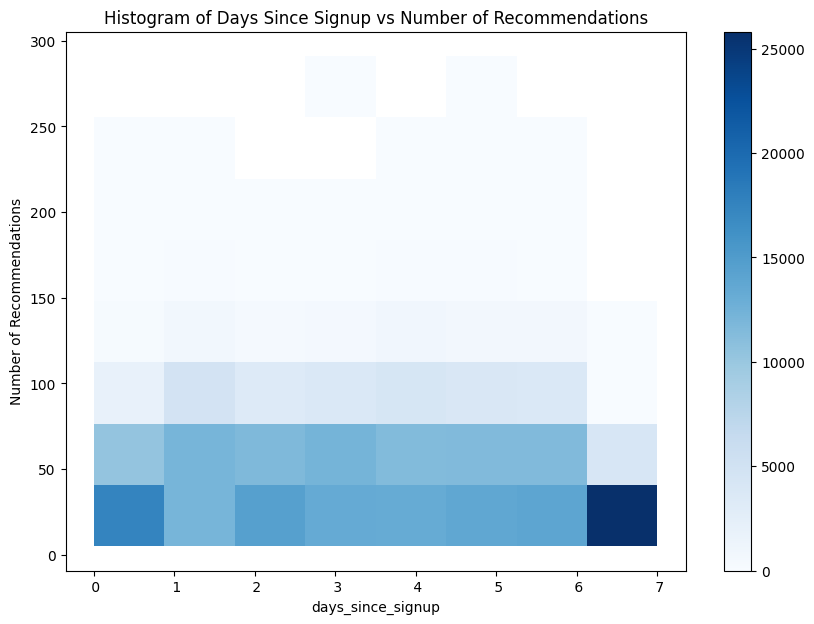

In [3]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='days_since_signup', y='count', bins=df['days_since_signup'].max()+1, cmap='Blues', cbar=True)
plt.xlabel('days_since_signup')
plt.ylabel('Number of Recommendations')
plt.title('Histogram of Days Since Signup vs Number of Recommendations')
plt.xticks(ticks=range(df['days_since_signup'].max()+1), labels=[f' {i}' for i in range(df['days_since_signup'].max()+1)])
plt.savefig('Result/histogram_EBNeRD.png')
plt.show()

In [4]:
first_day_avg = df.loc[df['days_since_signup'] == df['days_since_signup'].min(), 'count'].mean()
last_day_avg = df.loc[df['days_since_signup'] == df['days_since_signup'].max(), 'count'].mean()

print("Average of Count")
print("Average of Count in first day", first_day_avg)
print("Average of Count in last day", last_day_avg)

Average of Count
Average of Count in first day 38.98280612075547
Average of Count in last day 22.27324327015634


In [5]:
first_day_avg = df.loc[df['days_since_signup'] == df['days_since_signup'].min(), 'variety'].mean()
last_day_avg = df.loc[df['days_since_signup'] == df['days_since_signup'].max(), 'variety'].mean()

print("Average of variety")
print("Average of variety in first day", first_day_avg)
print("Average of variety in last day", last_day_avg)

Average of variety
Average of variety in first day 15.797689779931623
Average of variety in last day 9.329007202841305


In [6]:
# diversity = mean(variety) / mean(count)
first_day_avg = df[df.groupby('user')['days_since_signup'].transform('min') == df['days_since_signup']]['variety'].mean() / df[df.groupby('user')['days_since_signup'].transform('min') == df['days_since_signup']]['count'].mean()
final_day_avg = df[df.groupby('user')['days_since_signup'].transform('max') == df['days_since_signup']]['variety'].mean() / df[df.groupby('user')['days_since_signup'].transform('max') == df['days_since_signup']]['count'].mean()

print("Average of diversity", first_day_avg)
print("Average of diversity", final_day_avg)

Average of diversity 0.405247629711308
Average of diversity 0.41884368116883697


In [7]:
# diversity = mean(variety / count)
df['diversity'] = df['variety']/ df['count']
first_day_avg = df[df.groupby('user')['days_since_signup'].transform('min') == df['days_since_signup']]['diversity'].mean() 
final_day_avg = df[df.groupby('user')['days_since_signup'].transform('max') == df['days_since_signup']]['diversity'].mean() 

print("Average of diversity", first_day_avg)
print("Average of diversity", final_day_avg)

Average of diversity 0.4467609632799648
Average of diversity 0.4739540162262342


# Dataset KuaiSARv2

In [8]:

base_folder2 ="recsys-23-results/KuaiSARv2"
samples_for_model2 ="samples_for_model.csv"
samples_for_model_path2 = os.path.join(base_folder2, samples_for_model2)
df2 = pd.read_csv(samples_for_model_path2)

print(df.head())

    user  day_index  days_since_signup  count  variety  diversity
0  10198          0                  0     23       11   0.478261
1  10198          1                  1     33       20   0.606061
2  10198          2                  2      6        5   0.833333
3  10198          3                  3     46       18   0.391304
4  10198          4                  4     29       12   0.413793


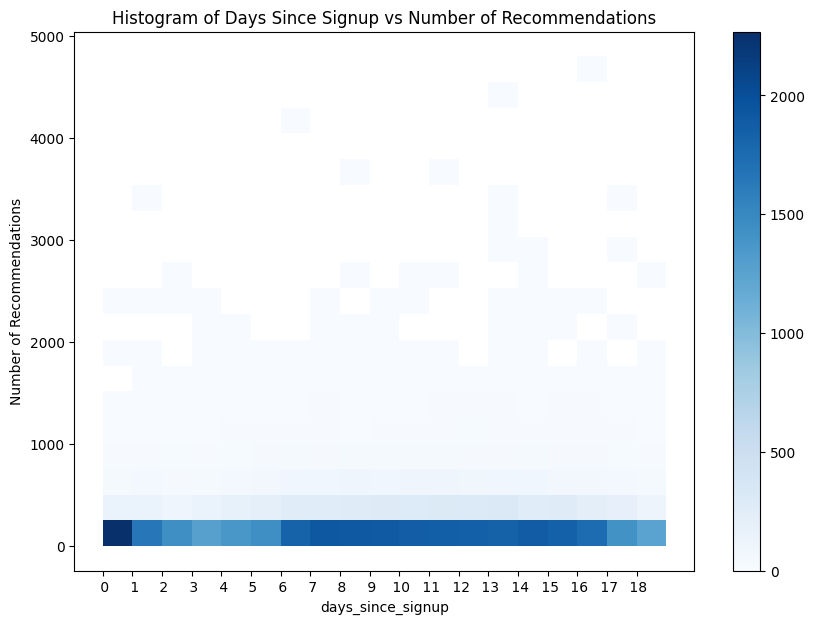

In [9]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df2, x='days_since_signup', y='count', bins=df2['days_since_signup'].max(), cmap='Blues', cbar=True)
plt.xlabel('days_since_signup')
plt.ylabel('Number of Recommendations')
plt.title('Histogram of Days Since Signup vs Number of Recommendations')
plt.xticks(ticks=range(df2['days_since_signup'].max()), labels=[f' {i}' for i in range(df2['days_since_signup'].max())])
plt.savefig('Result/histogram_KuaiSARv2.png')
plt.show()

In [10]:
first_day_avg = df2.loc[df2['days_since_signup'] == df2['days_since_signup'].min(), 'count'].mean()
last_day_avg = df2.loc[df2['days_since_signup'] == df2['days_since_signup'].max(), 'count'].mean()

print("Average of Count")
print("Average of Count in first day", first_day_avg)
print("Average of Count in last day", last_day_avg)

Average of Count
Average of Count in first day 91.84304207119742
Average of Count in last day 31.84516129032258


In [11]:
first_day_avg = df2.loc[df2['days_since_signup'] == df2['days_since_signup'].min(), 'variety'].mean()
last_day_avg =  df2.loc[df2['days_since_signup'] == df2['days_since_signup'].max(), 'variety'].mean()

print("Average of variety")
print("Average of variety in first day", first_day_avg)
print("Average of variety in last day", last_day_avg)

Average of variety
Average of variety in first day 14.888754045307444
Average of variety in last day 10.735483870967743


In [12]:
# diversity = mean(variety) / mean(count)
first_day_avg = df2[df2.groupby('user')['days_since_signup'].transform('min') == df2['days_since_signup']]['variety'].mean() / df2[df2.groupby('user')['days_since_signup'].transform('min') == df2['days_since_signup']]['count'].mean()
final_day_avg = df2[df2.groupby('user')['days_since_signup'].transform('max') == df2['days_since_signup']]['variety'].mean() / df2[df2.groupby('user')['days_since_signup'].transform('max') == df2['days_since_signup']]['count'].mean()

print("Average of diversity", first_day_avg)
print("Average of diversity", final_day_avg)

Average of diversity 0.16211085466622033
Average of diversity 0.14519654798138884


In [13]:
# diversity = mean(variety / count)
df2['diversity'] = df2['variety']/ df2['count']
first_day_avg = df2[df2.groupby('user')['days_since_signup'].transform('min') == df2['days_since_signup']]['diversity'].mean() 
final_day_avg = df2[df2.groupby('user')['days_since_signup'].transform('max') == df2['days_since_signup']]['diversity'].mean() 

print("Average of diversity", first_day_avg)
print("Average of diversity", final_day_avg)

Average of diversity 0.4389158274125606
Average of diversity 0.43249411616236244
